# Logistic回归
优点：计算代价不高，易于理解和实现。
缺点：容易欠拟合，分类精度可能不高。
使用数据类型：数值型和标称型数据。
### 梯度上升法的伪代码
    每个回归系数初始化为1
    重复R次：
        计算整个数据集的梯度
        使用alpha×gradient更新回归系数的向量
    返回回归系数

### Logistic回归梯度上升优化方法

In [1]:
from numpy import *
def loadDataSet():                                                        # 加载数据集
    dataMat = []                                                          # 创建数据列表
    labelMat = []                                                         # 创建标签列表
    fr = open('testSet.txt')                                              # 打开测试数据文件
    for line in fr.readlines():                                           # 读取文件每一行
        lineArr = line.strip().split()                                    # 除去每一行的空格后拆分成列表， 例如 ['0.317029', '14.739025', '0']
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])       # 增加子列表，[1.0,lineArr第一个元素（float）,lineArr第二个元素（float）] ，其中1.0为第0维的特征X0
        labelMat.append(int(lineArr[2]))                                  # 添加元素，元素来源于 lineArr列表的第三个元素（transform str to int first） 即类别向量     
    return dataMat, labelMat                                              # 返回数据列表，标签列表
                                                                          # 注：[1.0, float(lineArr[0]), float(lineArr[1])] 中的1.0 表示的是特征X0 的值，一般默认X0 = 1.0（or 1）

In [2]:
def sigmoid(inX):   # 定义sigmoid函数， 同书P74
    return 1.0/(1+exp(-inX))

In [3]:
def gradAscent(dataMatIn, classLabels):                                   # 定义梯度上升函数
    dataMatrix = mat(dataMatIn)                                           # 把数据列表转化成矩阵形式（列表和矩阵的简单差别：列表一般是一行，以逗号分隔，而矩阵是多行，没逗号）
    labelMat = mat(classLabels).transpose()                               # 把标签列表转化成矩阵形式，然后转置 （行向量 -> 列向量）
    m,n = shape(dataMatrix)                                               # 取数据矩阵的行和列 ，第一个是 行数m=100， 第二个是 列数n=3 
    alpha = 0.001                                                         # 学习率初始化 = 0.001
    maxCycles = 500                                                       # 最大循环次数 = 500
    weights = ones((n,1))                                                 # 参数初始化为 = 0.0   列向量（形式为n行1列）
    for k in range(maxCycles):  
        h = sigmoid(dataMatrix * weights)                                 # 1.0/(1+exp(-Z)    f[x,y] = Z = dataMatrix * weights
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error        # 更新参数 
    return weights                                                        # 返回 参数

In [29]:
dataArr, labelMat = loadDataSet()         #载入数据
dataMatrix = mat(dataArr)                 #特征矩阵
#print(dataMatrix)
res = gradAscent(dataArr,labelMat)       #使用梯度上升找到最佳参数并返回
print(shape(res))
sss=shape(res.getA())
print(sss)
#res.getA()

(3, 1)
(3, 1)


### 画出数据集和Logistic回归最佳你和直线的函数

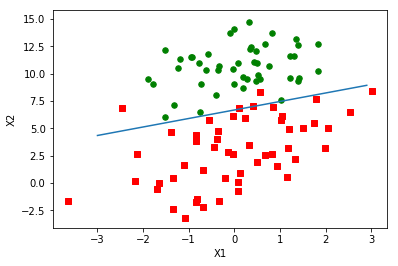

In [27]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()                             # 赋值数据列表， 标签列表（元素只有1 和 0）
    dataArr = array(dataMat)                                      # array(dataMat) 不等于 mat(dataMat),但是形式上好像一样
    n = shape(dataArr)[0]                                         # n=100  数组的行n=100，（数组的列m=3）
    xcord1 = []  
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):                                            # 遍历 （0->100-1）
        if int(labelMat[i]) == 1:                                 # 如果第i个元素的标签值是 1
            xcord1.append(dataArr[i,1])                           # 把对应数据数组（形似矩阵）的第i行的第2个元素 增加到 xcord1
            ycord1.append(dataArr[i,2])                           # 把对应数据数组（形似矩阵）的第i行的第3个元素 增加到 ycord1
        else:                                                     # 如果标签列表（labelMat）中第i个元素的标签是 0
            xcord2.append(dataArr[i,1])                           # 同上 
            ycord2.append(dataArr[i,2])                           # 同上
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')         #阳性样本的散点图
    ax.scatter(xcord2, ycord2, s=30, c='green')                   #阴性样本的散点图
                                                                  # 绘制拟合直线
    x = arange(-3.0,3.0,0.1)                                      # x取值范围 起点-3.0， 终点3.0 步长0.1 
    y = (-weights[0]-weights[1]*x)/weights[2]                     # weight[1]是1*1的矩阵
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
plotBestFit(res.getA())                                          #getA()使矩阵变为数组

###  随机梯度上升算法
#### 和梯度上升法的区别：
- 后者的变量h和error都是向量，而前者则全是数值；
- 前者没有矩阵的转化过程，所有变量的数据类型都是Numpy数组

In [15]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m,n = shape(dataMatrix)                                           # 取数组（narray）的行，列 m=100， n=3  （narray 和 matrix 长的一样）
    weights = ones(n)                                                 # [1. 1. 1.]
    for j in range(numIter):                                          # 循环到 最大循环次数numIter = 150：
                                                                      # dataIndex = range(m) ### 书中需要更改的地方  tip: TypeError: 'range' object doesn't support item deletion
        dataIndex = list(range(m))                                    # 创建一个0到99， 步长为1 的列表
        for i in range(m):                                            # 循环listIndex
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0, len(dataIndex)))        # 随机整数值，返回 0 到 m - 1（这里是99）
            h = sigmoid(sum(dataMatrix[randIndex]*weights))           #  1.0/(1+exp(-Z))    Z = dataMatrix * weights
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex] # 更新权重
            del(dataIndex[randIndex])                                 # 删除用过的 随机数 （避免重复）
    return weights                                                    # 返回权重

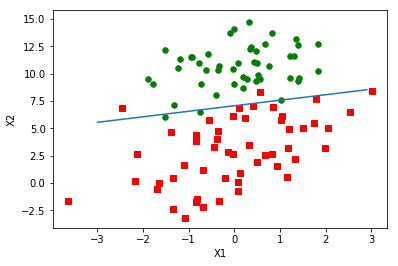

In [17]:
from numpy import *
dataArr,labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights) 

## 示例：从疝气病症预测病吗的死亡率

In [30]:
# Logistic回归分类函数
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))                             # 输入Z=inX*weights（特征向量*回归系数） 计算Sigmoid值
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt')                     # 打开训练集
    frTest = open('horseColicTest.txt')                          # 打开测试集
    trainingSet = []                                             # 初始化训练集列表
    trainingLabels = []                                          # 初始化训练标签列表 
    for line in frTrain.readlines():                             # 读取训练文本的 每一行 
        currLine = line.strip().split('\t')                      # 除去空格，然后用split方法 转化 成list
        lineArr = []                                             # 定义行数组（处理每行数据）
        for i in range(21):                                      # 数据有22列，前21个为特征，最后一个是分类标签
            lineArr.append(float(currLine[i]))                   # 添加currLine的第i个元素到lineArr
        trainingSet.append(lineArr)                              # 把 lineArr 作为 子列表 添加到 训练集列表trainingSet
        trainingLabels.append(float(currLine[21]))               # 把 currLine 最后一个元素（是标签） 添加到训练标签trainingLabels
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabels,500)   # 迭达500次 求 训练权重
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():                              # 读取测试文本的每一行
        numTestVec += 1.0                                        # numTestVec == 1.0
        currLine = line.strip().split('\t')                      # 除去空格，然后用split方法 转化 成list
        lineArr = []                                             # 定义行数组（处理每行数据）
        for i in range(21):                                      # 数据有22列，前21个为特征，最后一个是分类标签
            lineArr.append(float(currLine[i]))                   # 添加currLine的第i个元素到lineArr
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):  # 如果分类有错误
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)                   # 计算错误率
    print("the error rate of this test is: %f" % errorRate)
    return errorRate
                                                                 # errorCount,numTestVec 各变量结果  25, 67.0

def multiTest():                                                 # 调用colicTest（）函数10次并求错误率的平均值
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))
    
print(colicTest())
multiTest()

the error rate of this test is: 0.358209
0.3582089552238806
the error rate of this test is: 0.417910
the error rate of this test is: 0.343284
the error rate of this test is: 0.283582
the error rate of this test is: 0.343284
the error rate of this test is: 0.373134
the error rate of this test is: 0.298507
the error rate of this test is: 0.432836
the error rate of this test is: 0.373134
the error rate of this test is: 0.388060
the error rate of this test is: 0.298507
after 10 iterations the average error rate is: 0.355224
